# Pymaceuticals Inc.
---

### Analysis

- Based on the scatter plot, it is clear that Capomulin and Ramicane (FIG 1) work best to reduce tumors, with that being said Capomulin showed the strongest imporovement in tumor volume. Ramicane showed the lowest tumor median (Table 4). Ramicane, had the highest tumor volume reduction over the period of the study.



- There is a positive correlation between weight and average tumor volume as their calculated correlation is 0.84 which means as the mice weight increases so does the average tumor volume.

- With the data at hand, it is right to say that mice gender (Fig 3) did not have any correlation on the efficacy of the studied treatments. Tumor sizes increased and decreased mainly with the different treatments administrated.

 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
joint_data = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")

# Display the data table for preview
joint_data.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


#### Table 1
-----

In [2]:
# Checking the number of mice.
number_of_mice = len(mouse_metadata["Mouse ID"].unique())


In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_id = joint_data.loc[joint_data.duplicated(subset=["Mouse ID", "Timepoint"]), "Mouse ID"].unique()
dup_id

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice = joint_data.loc[joint_data["Mouse ID"] == "g989", :]
duplicate_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


#### Table 2
-----

In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mice_df = joint_data[joint_data["Mouse ID"].isin(dup_id)==False]
clean_mice_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


#### Table 3
-----

In [6]:
# Checking the number of mice in the clean DataFrame.
clean_num = clean_mice_df["Mouse ID"].nunique()
clean_num

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

mean = clean_mice_df["Tumor Volume (mm3)"].groupby(clean_mice_df["Drug Regimen"]).mean()
median = clean_mice_df["Tumor Volume (mm3)"].groupby(clean_mice_df["Drug Regimen"]).median()
variance = clean_mice_df["Tumor Volume (mm3)"].groupby(clean_mice_df["Drug Regimen"]).var()
std = clean_mice_df["Tumor Volume (mm3)"].groupby(clean_mice_df["Drug Regimen"]).std()
sem = clean_mice_df["Tumor Volume (mm3)"].groupby(clean_mice_df["Drug Regimen"]).sem()

# Assemble the resulting series into a single summary DataFrame.
summary_df = pd.DataFrame({"Mean Tumor Volume": mean,
                           "Median Tumor Volume": median, 
                           "Tumor Volume Variance": variance, 
                           "Tumor Volume Std. Dev.": std,
                           "Tumor Volume Std. Err.": sem})


summary_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


#### Table 4
-----

In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_agg = clean_mice_df.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":["mean", "median", "var", "std", "sem"]})


summary_agg

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

#### Table 5
-----

## Bar and Pie Charts

In [9]:
mice_sum = clean_mice_df["Drug Regimen"].value_counts()

summary_mice_sum = pd.DataFrame({"Mice Sum": mice_sum})

summary_mice_sum

,Mice Sum
Capomulin,230
Ramicane,228
Ketapril,188
Naftisol,186
Zoniferol,182
Placebo,181
Stelasyn,181
Infubinol,178
Ceftamin,178
Propriva,148


#### Table 6
-----

Text(0.5, 1.0, 'Data Points Per Drug Regimen')

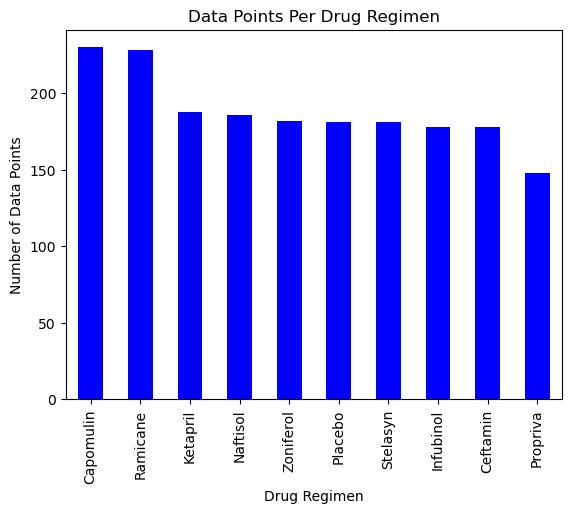

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
bar_plot = clean_mice_df["Drug Regimen"].value_counts().plot.bar(width=0.5, zorder=3, color="b")

plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")
plt.title("Data Points Per Drug Regimen")

#### Fig 1
-----

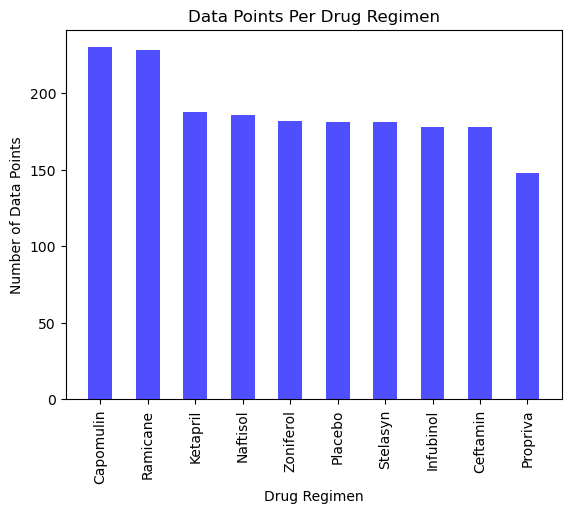

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis = mice_sum.index.values
y_axis = mice_sum.values

plt.bar(x_axis, y_axis, color="b", alpha=.69, width=0.5, zorder=3)

plt.title("Data Points Per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")
plt.xticks(rotation=90)

plt.show()

#### Fig 2
-----

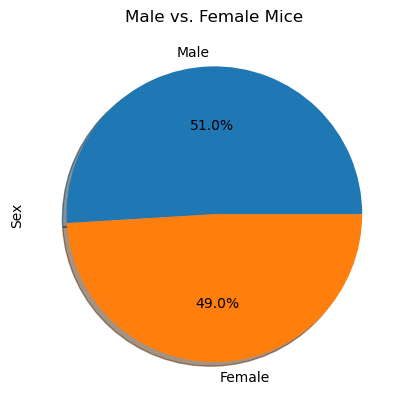

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mice_gender = clean_mice_df["Sex"].value_counts()
plt.title("Male vs. Female Mice")
mice_gender.plot(kind="pie", autopct="%1.1f%%", startangle=0, shadow=True)
plt.show()

#### Fig 3
-----

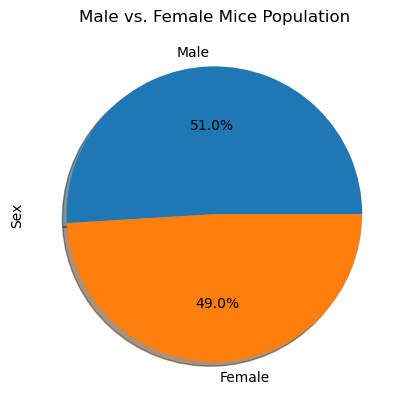

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Male", "Female"]
sizes = [49.799197, 50.200803]
plot = mice_gender.plot.pie(y="Total Count", autopct="%1.1f%%", shadow=True)
plt.title("Male vs. Female Mice Population")
plt.ylabel("Sex")
plt.show()

#### Fig 4
-----

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

capomulin_df = clean_mice_df.loc[clean_mice_df["Drug Regimen"] == "Capomulin",:]
ramicane_df = clean_mice_df.loc[clean_mice_df["Drug Regimen"] == "Ramicane", :]
infubinol_df = clean_mice_df.loc[clean_mice_df["Drug Regimen"] == "Infubinol", :]
ceftamin_df = clean_mice_df.loc[clean_mice_df["Drug Regimen"] == "Ceftamin", :]


In [15]:
# Obtaining Last Timepoint Data for Capomulin Treatment
capomulin_last = capomulin_df.groupby("Mouse ID").max()["Timepoint"]
capomulin_vol = pd.DataFrame(capomulin_last)


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
capomulin_merge = pd.merge(capomulin_vol, capomulin_df, on=("Mouse ID", "Timepoint"), how="left")
capomulin_merge.sort_values(['Mouse ID']).head(10)

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,b128,45,Capomulin,Female,9,22,38.982878,2
1,b742,45,Capomulin,Male,7,21,38.939633,0
2,f966,20,Capomulin,Male,16,17,30.485985,0
3,g288,45,Capomulin,Male,3,19,37.074024,1
4,g316,45,Capomulin,Female,22,22,40.159220,2
5,i557,45,Capomulin,Female,1,24,47.685963,1
6,i738,45,Capomulin,Female,23,20,37.311846,2
7,j119,45,Capomulin,Female,7,23,38.125164,1
8,j246,35,Capomulin,Female,21,21,38.753265,1
9,l509,45,Capomulin,Male,17,21,41.483008,3


#### Table 7
-----

In [16]:
# Obtaining Last Timepoint Data for Ramicane Treatment

ramicane_last = ramicane_df.groupby("Mouse ID").max()["Timepoint"]
ramicane_vol = pd.DataFrame(ramicane_last)

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
ramicane_merge = pd.merge(ramicane_vol, ramicane_df, on=("Mouse ID", "Timepoint"), how="left")
ramicane_merge.sort_values(['Mouse ID']).head(10)

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a411,45,Ramicane,Male,3,22,38.407618,1
1,a444,45,Ramicane,Female,10,25,43.047543,0
2,a520,45,Ramicane,Male,13,21,38.810366,1
3,a644,45,Ramicane,Female,7,17,32.978522,1
4,c458,30,Ramicane,Female,23,20,38.342008,2
5,c758,45,Ramicane,Male,9,17,33.397653,1
6,d251,45,Ramicane,Female,8,19,37.311236,2
7,e662,45,Ramicane,Male,8,24,40.659006,2
8,g791,45,Ramicane,Male,11,16,29.128472,1
9,i177,45,Ramicane,Male,10,18,33.562402,3


#### Table 8
-----

In [17]:
# Obtaining Last Timepoint Data for Infubinol Treatment

infubinol_last = infubinol_df.groupby("Mouse ID").max()["Timepoint"]
infubinol_vol = pd.DataFrame(infubinol_last)

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
infubinol_merge = pd.merge(infubinol_vol, infubinol_df, on=("Mouse ID", "Timepoint"), how="left")
infubinol_merge.sort_values(['Mouse ID']).head(10)

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a577,30,Infubinol,Female,6,25,57.031862,2
3,a685,45,Infubinol,Male,8,30,66.083066,3
4,c139,45,Infubinol,Male,11,28,72.226731,2
5,c326,5,Infubinol,Female,18,25,36.321346,0
6,c895,30,Infubinol,Female,7,29,60.969711,2
7,e476,45,Infubinol,Male,23,26,62.435404,1
8,f345,45,Infubinol,Male,23,26,60.918767,1
9,i386,40,Infubinol,Female,23,29,67.289621,4


#### Table 9
-----

In [18]:
# Obtaining Last Timepoint Data for Ceftamin Treatment
ceftamin_last = ceftamin_df.groupby("Mouse ID").max()["Timepoint"]
ceftamin_vol = pd.DataFrame(ceftamin_last)

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
ceftamin_merge = pd.merge(ceftamin_vol, ceftamin_df, on=("Mouse ID", "Timepoint"), how="left")
ceftamin_merge.sort_values(['Mouse ID']).head(10)

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a275,45,Ceftamin,Female,20,28,62.999356,3
1,b447,0,Ceftamin,Male,2,30,45.000000,0
2,b487,25,Ceftamin,Female,6,28,56.057749,1
3,b759,30,Ceftamin,Female,12,25,55.742829,1
4,f436,15,Ceftamin,Female,3,25,48.722078,2
5,h531,5,Ceftamin,Male,5,27,47.784682,0
6,j296,45,Ceftamin,Female,24,30,61.849023,3
7,k210,45,Ceftamin,Male,15,28,68.923185,3
8,l471,45,Ceftamin,Female,7,28,67.748662,1
9,l490,30,Ceftamin,Male,24,26,57.918381,3


#### Table 10
-----

In [19]:
merged_regimens_df = [capomulin_merge, ramicane_merge, infubinol_merge, ceftamin_merge]

merged_regimens = pd.concat(merged_regimens_df)


In [20]:
# Put treatments into a list for the for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
for treatment in treatments:
    treatment_df = merged_regimens.loc[merged_regimens["Drug Regimen"] == treatment, :]
    quartiles = treatment_df["Tumor Volume (mm3)"].quantile([.25,.5,.75])
    tumor_vol_data.append({"Treatment": treatment, "Lower Quartile": quartiles[0.25],
                           "Upper Quartile": quartiles[0.75], "IQR": quartiles[0.75] - quartiles[0.25],
                           "Median": quartiles[0.5],
                           "Lower Bound": quartiles[0.25] - (1.5 * (quartiles[0.75] - quartiles[0.25])), 
                           "Upper Bound": quartiles[0.75] + (1.5 * (quartiles[0.75] - quartiles[0.25]))})

quartiles_df = pd.DataFrame(tumor_vol_data)

quartiles_df


,Treatment,Lower Quartile,Upper Quartile,IQR,Median,Lower Bound,Upper Bound
0,Capomulin,32.377357,40.159220,7.781863,38.125164,20.704562,51.832015
1,Ramicane,31.560470,40.659006,9.098537,36.561652,17.912664,54.306811
2,Infubinol,54.048608,65.525743,11.477135,60.165180,36.832905,82.741446
3,Ceftamin,48.722078,64.299830,15.577752,59.851956,25.355450,87.666458


#### Table 11
-----

# Potential Outliers for Capomulin

- The Lower Quartile of Capomulin is: 32.37735684

- The Upper Quartile of Capomulin is: 40.1592203

- The Interquartile Range of Capomulin is: 7.781863460000004

- The Median of Capomulin is: 38.1251644

- The Lower Bound of Capomulin is: 20.70456164999999

- The Upper Bound of Capomulin is: 51.83201549

- Values below 20.70456164999999 could be outliers.

- Values above 51.83201549 could be outliers.


In [21]:
# Print the IQR, median, and potential outliers for each treatment group. 
# I've made markdown cells for each drug regimen in order to make it easier to read.
# I've also made the print statements in order to showcase that I am able to print from the table ive created

# print(f"The Lower Quartile of Capomulin is: {quartiles_df.iloc[0, 1]}")
# print(f"The Upper Quartile of Capomulin is: {quartiles_df.iloc[0, 2]}")
# print(f"The Interquartile Range of Capomulin is: {quartiles_df.iloc[0, 3]}")
# print(f"The Median of Capomulin is: {quartiles_df.iloc[0, 4]}")
# print(f"The Lower Bound of Capomulin is: {quartiles_df.iloc[0, 5]}")
# print(f"The Upper Bound of Capomulin is: {quartiles_df.iloc[0, 6]}")
# print(f"Values below {quartiles_df.iloc[0, 5]} could be outliers.")
# print(f"Values above {quartiles_df.iloc[0, 6]} could be outliers.")

# Potential Outliers for Ramicane
- The Lower Quartile of Ramicane is: 31.56046955

- The Upper Quartile of Ramicane is: 40.65900627

- The Interquartile Range of Ramicane is: 9.098536719999998

- The Median of Ramicane is: 36.56165229

- The Lower Bound of Ramicane is: 17.912664470000003

- The Upper Bound of Ramicane is: 54.30681135

- Values below 17.912664470000003 could be outliers.

- Values above 54.30681135 could be outliers.

In [22]:
# print(f"The Lower Quartile of Ramicane is: {quartiles_df.iloc[1, 1]}")
# print(f"The Upper Quartile of Ramicane is: {quartiles_df.iloc[1, 2]}")
# print(f"The Interquartile Range of Ramicane is: {quartiles_df.iloc[1, 3]}")
# print(f"The Median of Ramicane is: {quartiles_df.iloc[1, 4]}")
# print(f"The Lower Bound of Ramicane is: {quartiles_df.iloc[1, 5]}")
# print(f"The Upper Bound of Ramicane is: {quartiles_df.iloc[1, 6]}")
# print(f"Values below {quartiles_df.iloc[1, 5]} could be outliers.")
# print(f"Values above {quartiles_df.iloc[1, 6]} could be outliers.")

# Potential Outliers for Infubinol

- The Lower Quartile of Infubinol is: 54.04860769

- The Upper Quartile of Infubinol is: 65.52574285

- The Interquartile Range of Infubinol is: 11.477135160000003

- The Median of Infubinol is: 60.16518046

- The Lower Bound of Infubinol is: 36.83290494999999

- The Upper Bound of Infubinol is: 82.74144559000001

- Values below 36.83290494999999 could be outliers.

- Values above 82.74144559000001 could be outliers.


In [23]:
# print(f"The Lower Quartile of Infubinol is: {quartiles_df.iloc[2, 1]}")
# print(f"The Upper Quartile of Infubinol is: {quartiles_df.iloc[2, 2]}")
# print(f"The Interquartile Range of Infubinol is: {quartiles_df.iloc[2, 3]}")
# print(f"The Median of Infubinol is: {quartiles_df.iloc[2, 4]}")
# print(f"The Lower Bound of Infubinol is: {quartiles_df.iloc[2, 5]}")
# print(f"The Upper Bound of Infubinol is: {quartiles_df.iloc[2, 6]}")
# print(f"Values below {quartiles_df.iloc[2, 5]} could be outliers.")
# print(f"Values above {quartiles_df.iloc[2, 6]} could be outliers.")

# Potential Outliers for Ceftamin

- The Lower Quartile of Ceftamin is: 48.72207785

- The Upper Quartile of Ceftamin is: 64.29983003

- The Interquartile Range of Ceftamin is: 15.577752179999997

- The Median of Ceftamin is: 59.85195552

- The Lower Bound of Ceftamin is: 25.355449580000002

- The Upper Bound of Ceftamin is: 87.66645829999999

- Values below 25.355449580000002 could be outliers.

- Values above 87.66645829999999 could be outliers.

In [24]:
# print(f"The Lower Quartile of Ceftamin is: {quartiles_df.iloc[3, 1]}")
# print(f"The Upper Quartile of Ceftamin is: {quartiles_df.iloc[3, 2]}")
# print(f"The Interquartile Range of Ceftamin is: {quartiles_df.iloc[3, 3]}")
# print(f"The Median of Ceftamin is: {quartiles_df.iloc[3, 4]}")
# print(f"The Lower Bound of Ceftamin is: {quartiles_df.iloc[3, 5]}")
# print(f"The Upper Bound of Ceftamin is: {quartiles_df.iloc[3, 6]}")
# print(f"Values below {quartiles_df.iloc[3, 5]} could be outliers.")
# print(f"Values above {quartiles_df.iloc[3, 6]} could be outliers.")

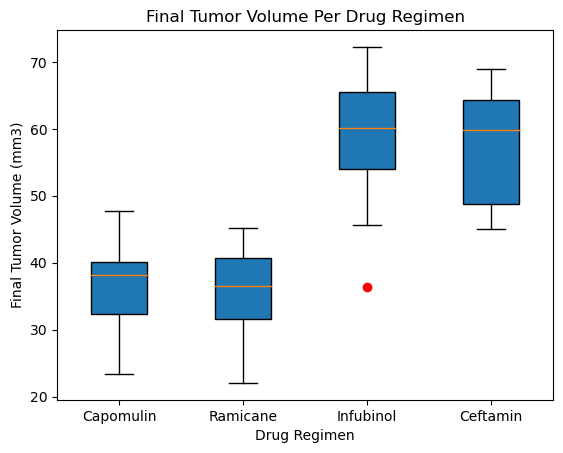

In [25]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
data = [capomulin_merge["Tumor Volume (mm3)"], ramicane_merge["Tumor Volume (mm3)"], 
        infubinol_merge["Tumor Volume (mm3)"], ceftamin_merge["Tumor Volume (mm3)"]]

# Create a list of labels corresponding to each treatment group
labels = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Creating the boxplot
plt.boxplot(data, labels=labels, sym="r", vert=True, patch_artist=True)

# Labels
plt.xlabel("Drug Regimen")
plt.ylabel("Final Tumor Volume (mm3)")
plt.title("Final Tumor Volume Per Drug Regimen")

plt.show()

##### Fig 5
-----

## Line and Scatter Plots

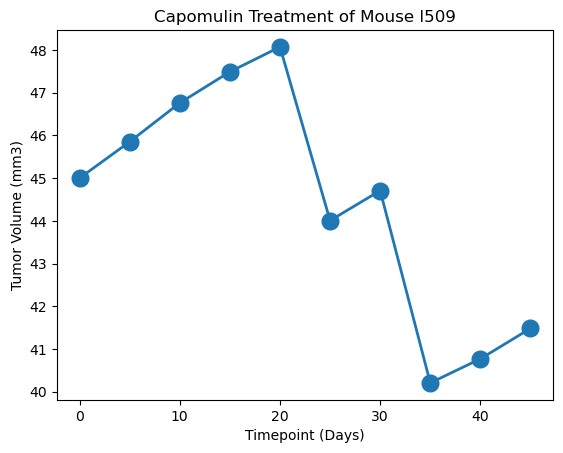

In [26]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_line_plot = capomulin_df.loc[capomulin_df["Mouse ID"] == "l509",:]

# Extracting the time points and tumor volume data for the selected mouse.
time_point = capomulin_line_plot["Timepoint"]
tumor_volume = capomulin_line_plot["Tumor Volume (mm3)"]

# Creating the line plot
plt.plot(time_point, tumor_volume, linewidth=2, markersize=12, marker = "o")

# Labels
plt.xlabel("Timepoint (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin Treatment of Mouse l509")

plt.show()

##### Fig 6
-----

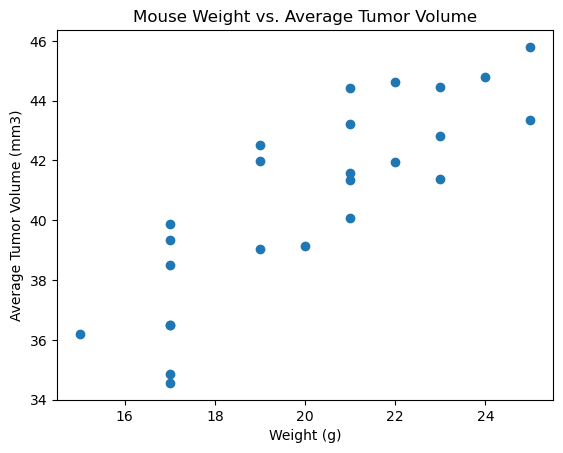

In [27]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_scatter_plot = capomulin_df.groupby(["Mouse ID"])

# Calculating Averages
mouse_weight = capomulin_scatter_plot["Weight (g)"].mean()
avg_tumor_vol = capomulin_scatter_plot["Tumor Volume (mm3)"].mean()

# Creating the scatter plot
plt.scatter(mouse_weight, avg_tumor_vol)

# Labels
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Mouse Weight vs. Average Tumor Volume")


plt.show()


##### Fig 7
-----

## Correlation and Regression

The correlation between mouse weight and average tumor volume is 0.84
The r-squared is: 0.7088568047708723


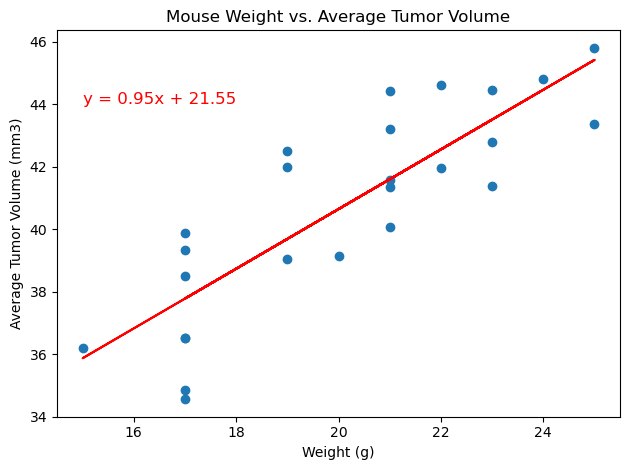

In [28]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

correlation = st.pearsonr(mouse_weight,avg_tumor_vol)
print(f"The correlation between mouse weight and average tumor volume is {round(correlation[0],2)}")

# Linear regression model
capomulin_s, capomulin_int, capomulin_r, capomulin_p, capomulin_std_err = st.linregress(mouse_weight, avg_tumor_vol)

# creating scatter plot with regression line
regression_values = mouse_weight * capomulin_s + capomulin_int
line_eq = "y = " + str(round(capomulin_s, 2)) + "x + " + str(round(capomulin_int, 2))
plt.scatter(mouse_weight, avg_tumor_vol)
plt.plot(mouse_weight, regression_values, "r-")
plt.annotate(line_eq,(15,44), fontsize=12,color="red")

# Labels
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Mouse Weight vs. Average Tumor Volume")
print(f"The r-squared is: {capomulin_r**2}")
plt.tight_layout()
plt.show()


##### Fig 8
-----